In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")



In [ ]:
# Load the data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [ ]:
# Display the first few rows of the training data
print(train_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [ ]:
# Check for missing values
print(train_data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [ ]:
# Separate features and target variable
X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']

In [ ]:
# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Define the models
models = {
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5)
}

In [ ]:
# Train and evaluate each model
for name, model in models.items():
    full_model = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', model)])
    full_model.fit(X_train, y_train)
    train_rmse = np.sqrt(mean_squared_error(y_train, full_model.predict(X_train)))
    val_rmse = np.sqrt(mean_squared_error(y_val, full_model.predict(X_val)))
    print(f"{name} - Train RMSE: {train_rmse}, Validation RMSE: {val_rmse}")


Ridge - Train RMSE: 21198.40712247094, Validation RMSE: 29791.509268021113
Lasso - Train RMSE: 19512.191255291003, Validation RMSE: 28210.385132945354
ElasticNet - Train RMSE: 32360.736110918246, Validation RMSE: 36236.382686460376




>
To select the best model among Ridge, Lasso, and ElasticNet, we typically choose the one with the lowest validation RMSE, as it indicates better performance on unseen data.

The Lasso model has the lowest validation RMSE (28210.39), indicating the best performance on unseen data among the three models. Therefore, the Lasso model can be considered the best model based on the provided evaluation metrics.



In [ ]:
# Append the Lasso regression model to the preprocessing steps
lasso_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('lasso', Lasso(alpha=1.0))])

In [ ]:
# Fit the Lasso model to the data
lasso_model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF'...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('lasso', Lasso())])

In [ ]:
# Make predictions on the test set
predictions = lasso_model.predict(test_data)

In [ ]:
# Save predictions to a CSV file
submission = pd.DataFrame({'Id': test_data.Id, 'SalePrice': predictions})
submission.to_csv('submission.csv', index=False)



>

In this code, we define three different advanced regression models: Ridge, Lasso, and ElasticNet. We train and evaluate each model using the training and validation sets, and then print out the train and validation RMSE for each model. Finally, we select the best model based on validation RMSE and make predictions on the test set using that model.

**Comparing the Performance of these Three Regression Models**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Train and evaluate each model
for name, model in models.items():
    full_model = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', model)])
    full_model.fit(X_train, y_train)
    y_train_pred = full_model.predict(X_train)
    y_val_pred = full_model.predict(X_val)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

    # Calculate R2 scores
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    print(f"{name} - Train RMSE: {train_rmse}, Validation RMSE: {val_rmse}, Train R2: {train_r2}, Validation R2: {val_r2}")

Ridge - Train RMSE: 21198.40712247094, Validation RMSE: 29791.509268021113, Train R2: 0.9246594569719575, Validation R2: 0.8842899245099948
Lasso - Train RMSE: 19512.191255291003, Validation RMSE: 28210.385132945354, Train R2: 0.9361685989149606, Validation R2: 0.8962461559192343
ElasticNet - Train RMSE: 32360.736110918246, Validation RMSE: 36236.382686460376, Train R2: 0.8244264571572313, Validation R2: 0.8288110055907076




>
The Lasso model seems to perform the best, as it has the lowest RMSE on both the training and validation sets and the highest R2 scores, indicating better fit.

The Ridge model performs slightly worse than the Lasso model but better than the ElasticNet model.

The ElasticNet model has the highest RMSE values and lowest R2 scores, indicating poorer performance compared to the other models.



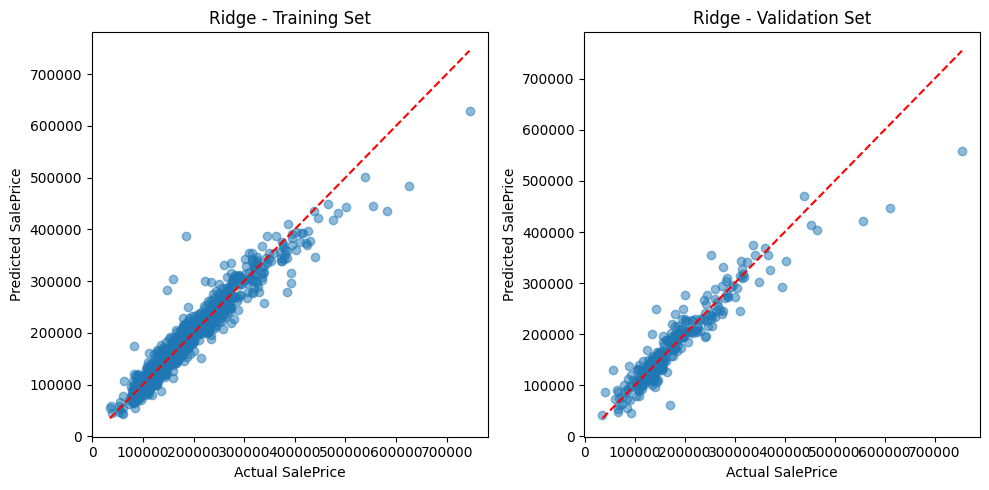

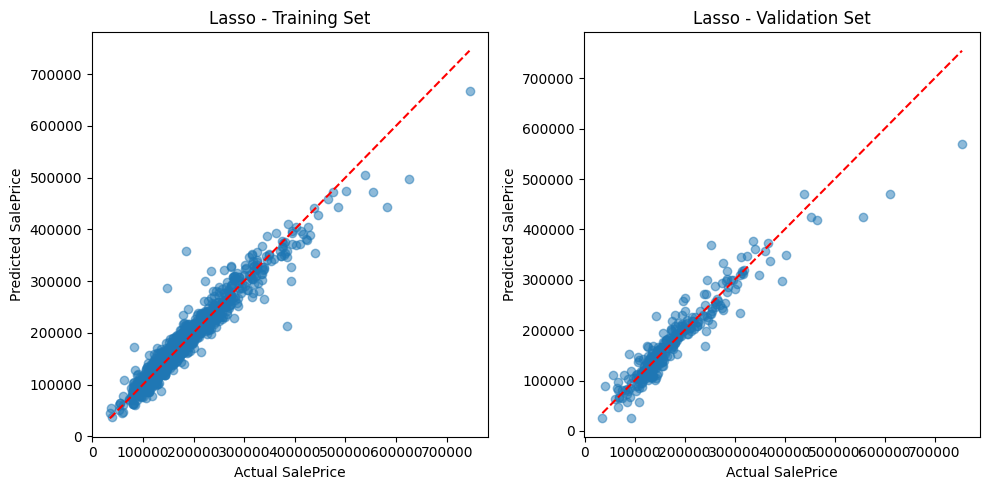

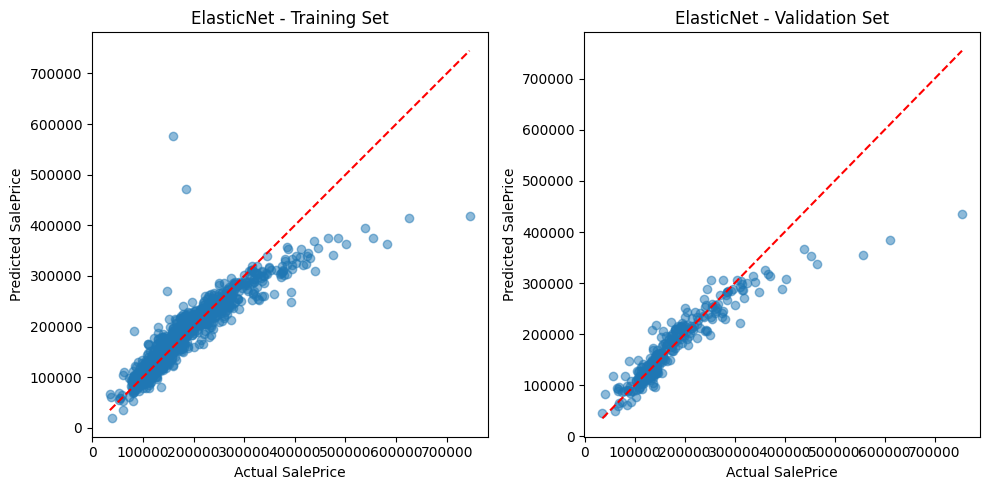

In [ ]:
import matplotlib.pyplot as plt

# Train and evaluate each model
for name, model in models.items():
    full_model = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', model)])
    full_model.fit(X_train, y_train)
    y_train_pred = full_model.predict(X_train)
    y_val_pred = full_model.predict(X_val)

    # Plot actual vs predicted for training set
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, alpha=0.5)
    plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red')
    plt.title(f"{name} - Training Set")
    plt.xlabel("Actual SalePrice")
    plt.ylabel("Predicted SalePrice")

    # Plot actual vs predicted for validation set
    plt.subplot(1, 2, 2)
    plt.scatter(y_val, y_val_pred, alpha=0.5)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='red')
    plt.title(f"{name} - Validation Set")
    plt.xlabel("Actual SalePrice")
    plt.ylabel("Predicted SalePrice")

    plt.tight_layout()
    plt.show()



>

This code will create scatter plots for each model, comparing the actual SalePrice values with the predicted SalePrice values for both the training and validation sets. The diagonal dashed line represents perfect predictions, where actual and predicted values are the same. You can observe how closely the points lie to this line to understand the model's performance.

**sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms**

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Define features used for prediction (year and month of sale, lot square footage, and number of bedrooms)
features = ['YrSold', 'MoSold', 'LotArea', 'BedroomAbvGr']

In [ ]:
# Extract features and target variable from the training data
X_train = train_data[features]
y_train = train_data['SalePrice']

In [ ]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions on the test data
X_test = test_data[features]
predictions = model.predict(X_test)

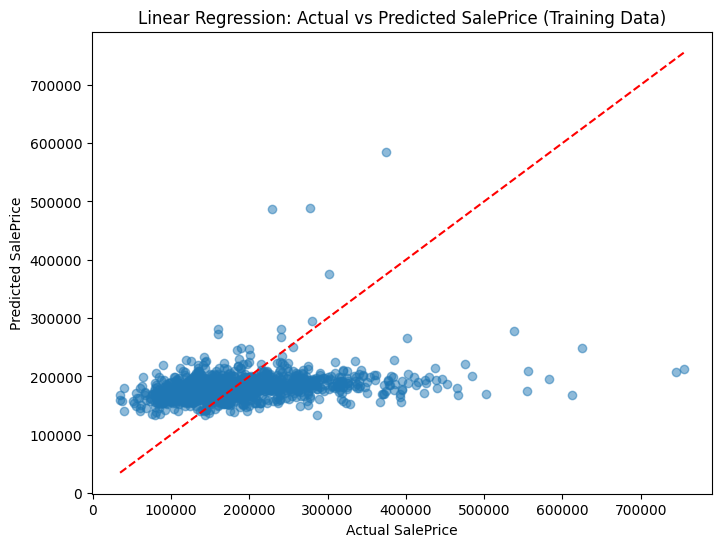

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the training data
predictions_train = model.predict(X_train)

# Plot actual vs predicted SalePrice
plt.figure(figsize=(8, 6))
plt.scatter(y_train, predictions_train, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red')
plt.title("Linear Regression: Actual vs Predicted SalePrice (Training Data)")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.show()



>

The dashed red line represents perfect predictions, where the actual and predicted values are the same. Points closer to this line indicate better predictions by the linear regression model on the training data.


In [ ]:
# Create a submission DataFrame
submission_df = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': predictions
})

In [ ]:
# Save the submission DataFrame to a CSV file
submission_df.to_csv("submission_linear.csv", index=False)